# Bước 0:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/huongd17at089/income_prediction/master/data_adult.csv"
df = pd.read_csv(url)

In [2]:
df.head(5)

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,1,1,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,2,2,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,3,3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,4,4,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,5,5,34,Private,10th,6,Never-married,White,Male,30,<=50K


In [3]:
df.tail(5)

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
46028,46029,46029,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46029,46030,46030,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K
46030,46031,46031,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K
46031,46032,46032,22,Private,HS-grad,9,Never-married,White,Male,20,<=50K
46032,46033,46033,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,White,Female,40,>50K


In [4]:
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.2+ MB


In [8]:
print("duplicate : ",any(df.duplicated().tolist()))
df.isnull().sum()

duplicate :  True


age                0
workclass          0
education          0
educational.num    0
marital.status     0
race               0
gender             0
hours.per.week     0
income             0
dtype: int64

In [11]:
df.iloc[df.duplicated().tolist()]

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
88,20,Private,HS-grad,9,Never-married,White,Male,40,<=50K
118,28,Private,HS-grad,9,Never-married,White,Male,40,<=50K
170,34,Private,Masters,14,Never-married,White,Male,40,<=50K
212,41,Private,Some-college,10,Married-civ-spouse,White,Male,40,<=50K
247,26,Private,Bachelors,13,Never-married,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
46022,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,White,Male,50,<=50K
46026,53,Private,Masters,14,Married-civ-spouse,White,Male,40,>50K
46027,22,Private,Some-college,10,Never-married,White,Male,40,<=50K
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K


In [13]:
df.drop_duplicates()

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,10th,6,Never-married,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...,...
46024,43,Private,Assoc-voc,11,Married-civ-spouse,White,Male,45,<=50K
46025,32,Private,Masters,14,Never-married,Asian-Pac-Islander,Male,11,<=50K
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46030,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K


In [14]:
df

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,10th,6,Never-married,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...,...
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K
46030,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K
46031,22,Private,HS-grad,9,Never-married,White,Male,20,<=50K


In [ ]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df.loc[ df.income == ">50K", "income"] = 1
df.loc[ df.income == "<=50K", "income"] = 0
df.income = df.income.astype("int64")
print(df.dtypes)

age                 int64
workclass          object
education          object
educational.num     int64
marital.status     object
race               object
gender             object
hours.per.week      int64
income              int64
dtype: object


In [16]:
continuous_vars = ["age", "educational.num", "hours.per.week"]
categorical_vars = ["workclass", "education", "marital.status", "race", "gender"]
target = "income"

# Bước 1

In [17]:
df1 = df[continuous_vars]
df1.sample(5)

,age,educational.num,hours.per.week
44286,49,9,40
17921,20,10,50
36847,31,12,40
28248,45,13,40
31325,46,13,53


In [18]:
df1.describe()

,age,educational.num,hours.per.week
count,46033.000000,46033.000000,46033.000000
mean,38.556601,10.128929,40.948407
std,13.204268,2.564064,12.011069
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


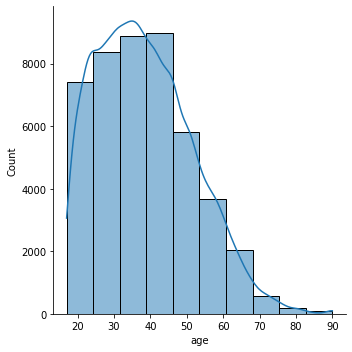

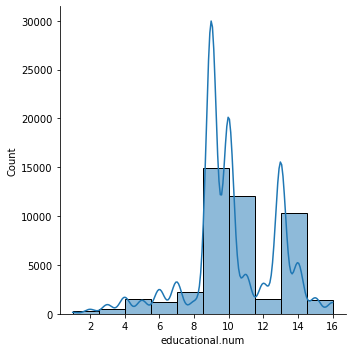

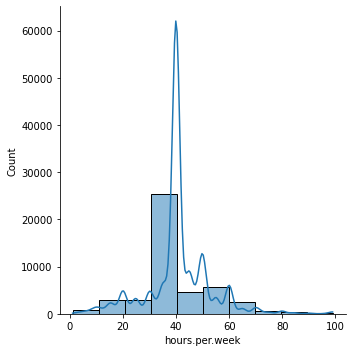

In [19]:
n_col = len(continuous_vars)
# fig, axes = plt.subplots(1,ncols=n_col, figsize = (10, 10))
for ind,var in enumerate(continuous_vars):
  sns.displot(df1[var],kde = True, bins = 10)

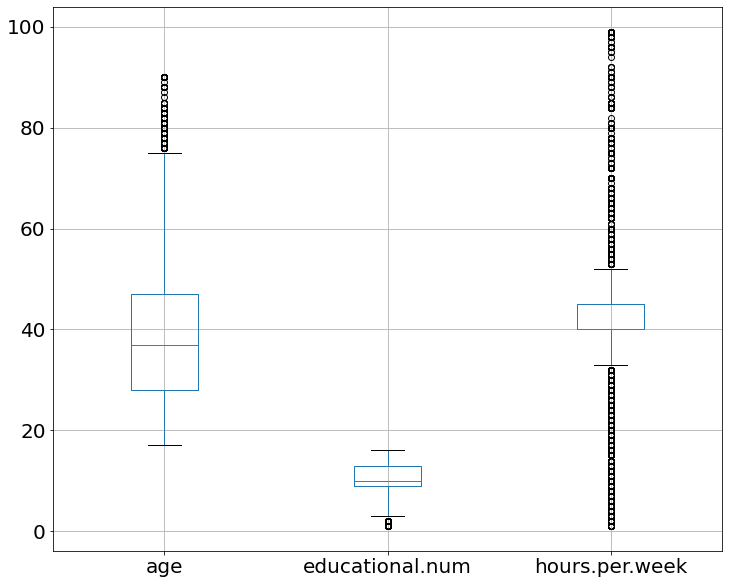

In [20]:
boxplot = df.boxplot(column=continuous_vars, figsize=(12, 10), fontsize=20)

In [ ]:
df.corr()

,age,educational.num,hours.per.week,income
age,1.000000,0.037566,0.102185,0.237338
educational.num,0.037566,1.000000,0.145151,0.332293
hours.per.week,0.102185,0.145151,1.000000,0.226795
income,0.237338,0.332293,0.226795,1.000000


#Bước 2

In [ ]:
df2 = df[categorical_vars]
df2.sample(5)

,workclass,education,marital.status,race,gender
9340,Private,Assoc-voc,Never-married,White,Male
15275,Private,HS-grad,Never-married,White,Female
22498,Private,HS-grad,Married-civ-spouse,White,Male
30856,Local-gov,HS-grad,Married-civ-spouse,Black,Male
36626,Private,HS-grad,Never-married,White,Male


<Figure size 432x288 with 0 Axes>

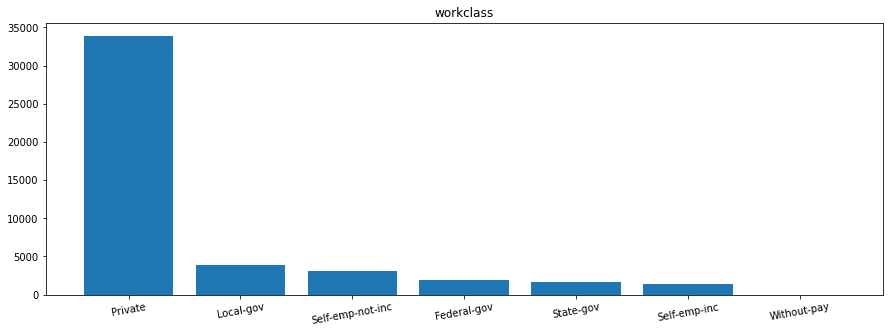

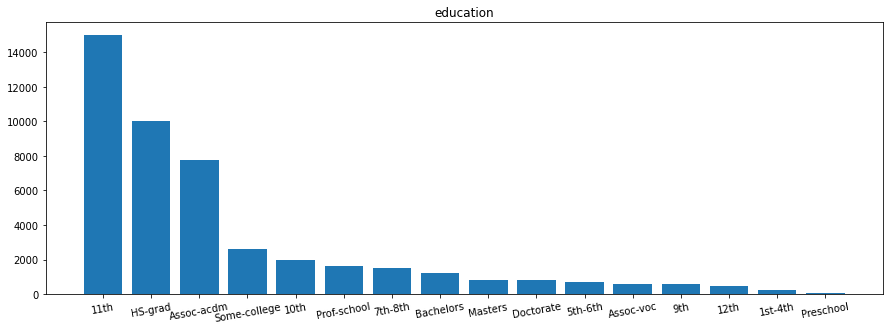

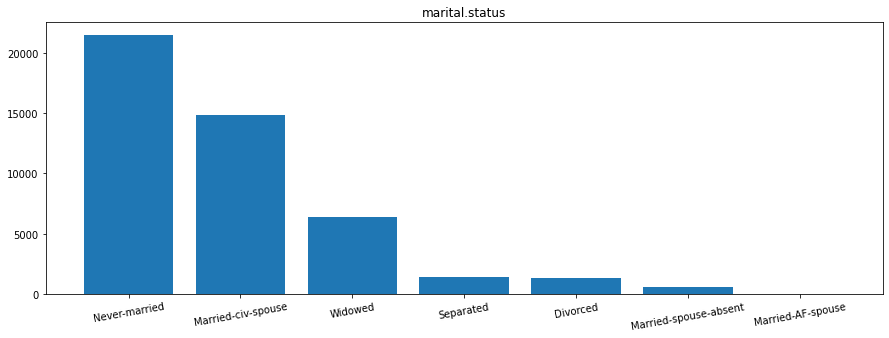

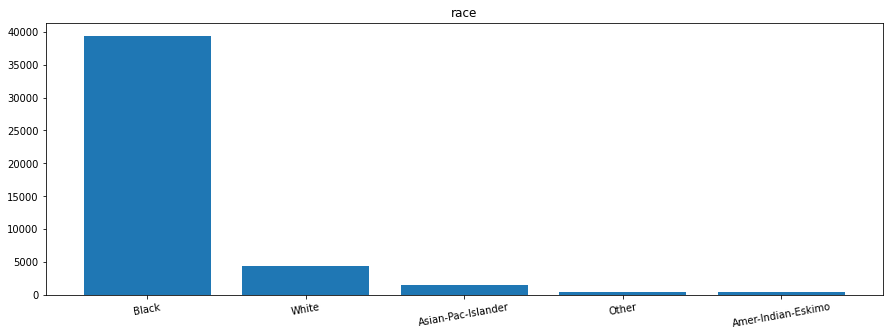

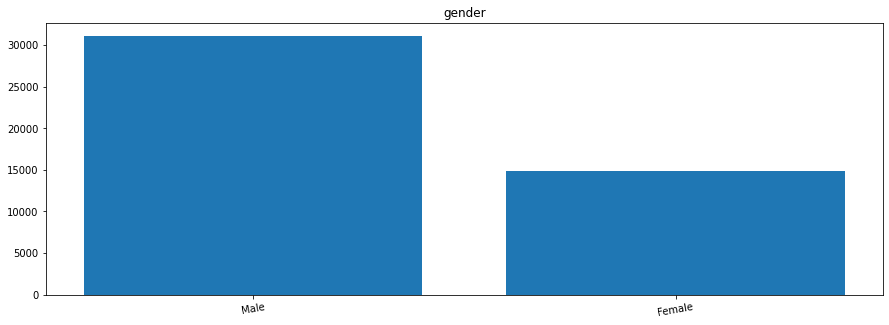

In [ ]:
from matplotlib import pyplot as plt
# fig,axes = plt.subplots(nrows=len(categorical_vars),figsize=(20,20))

for ind,var in enumerate(categorical_vars):
  Frequency = df2[var].value_counts().values
  Percentage = Frequency/len(Frequency)*100
  plt.figure(ind)
  plt.figure(figsize=(15,5));
  plt.bar( df2[var].unique(), Frequency)
  plt.title(var)
  plt.xticks(rotation = 10)
#   axes[ind,0].set_title(var)
#   axes[ind,1].pie(x=Percentage, radius=1.5)
# plt.legend();

# Bước 3

**Nháp**

In [ ]:
data = df.copy()
data["income"].unique()


array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.loc[ data.income == ">50K", "income"] = 0
data.loc[ data.income == "<=50K", "income"] = 1
data

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,1
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,0
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,0
4,34,Private,10th,6,Never-married,White,Male,30,1
...,...,...,...,...,...,...,...,...,...
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,1
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,0
46030,58,Private,HS-grad,9,Widowed,White,Female,40,1
46031,22,Private,HS-grad,9,Never-married,White,Male,20,1


In [ ]:
data.income = data.income.astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [ ]:
print(data.corr())

                      age  educational.num  hours.per.week    income
age              1.000000         0.037566        0.102185 -0.237338
educational.num  0.037566         1.000000        0.145151 -0.332293
hours.per.week   0.102185         0.145151        1.000000 -0.226795
income          -0.237338        -0.332293       -0.226795  1.000000


In [ ]:
from scipy import stats
import numpy as np

a = data.age.values
b = data.income.values

print(np.corrcoef(a, b))

[[1.         0.23733761]
 [0.23733761 1.        ]]
